# Pré-Aula 01 — Ritual do Curso (GitHub → Colab → Drive → Entrega)

**Disciplina:** Inteligência Artificial   
**Professor:** Marcelo Batista  
**Propósito:** esta aula não é sobre IA ainda — é sobre o **ritual de trabalho e entrega** que será repetido em todas as aulas.

# Hello Data - EDA (Exploratory Data Analysis) — Conteúdo prático

A EDA  é o primeiro hábito de um bom projeto de IA:
- Ver o que tem no dataset
- Checar tipos e valores faltantes
- Fazer gráficos simples
- Escrever insights (em português claro)

Vamos usar um dataset embutido no `seaborn`.


In [1]:
# Instalação (se necessário) - normalmente Colab já tem
import sys

def ensure(pkg):
    try:
        __import__(pkg)
        print(f"OK: {pkg}")
    except Exception:
        print(f"Instalando: {pkg}")
        !pip -q install {pkg}

ensure('pandas')
ensure('numpy')
ensure('matplotlib')
ensure('seaborn')


OK: pandas
OK: numpy
OK: matplotlib
OK: seaborn


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)


Python: 3.12.12
pandas: 2.2.2
seaborn: 0.13.2


## Carregar o dataset
Usaremos `titanic` (clássico para classificação). Não vamos modelar hoje, só entender dados.


In [3]:
df = sns.load_dataset('titanic')
df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Tamanho, colunas e tipos
Aqui o aluno aprende o hábito: **não treinar nada sem olhar a tabela**.


In [4]:
print("Linhas, colunas:", df.shape)
df.info()


Linhas, colunas: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Valores faltantes
IA na vida real: quase sempre tem missing. Aqui é só diagnóstico.


In [5]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


,0
deck,688
age,177
embarked,2
embark_town,2


## Estatísticas rápidas
Isso dá uma primeira noção de distribuição e possíveis outliers.


In [6]:
df.describe(include='all').T.head(20)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gráficos mínimos (2 gráficos)
O objetivo é o aluno praticar:
- gerar gráfico
- interpretar em português


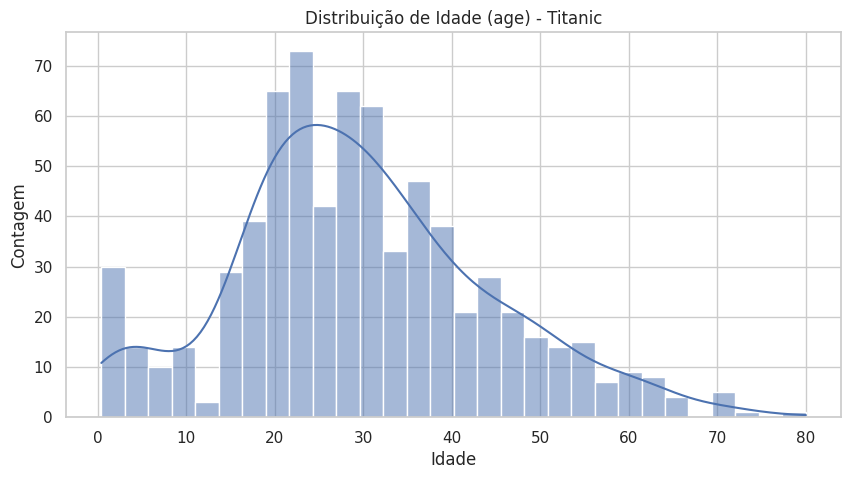

In [7]:
# Gráfico 1: distribuição de idade
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição de Idade (age) - Titanic')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


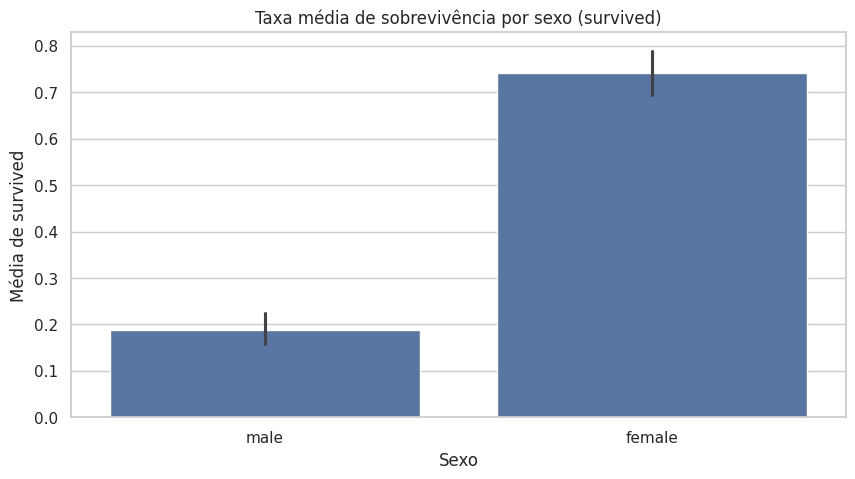

In [8]:
# Gráfico 2: sobrevivência por sexo
sns.barplot(data=df, x='sex', y='survived', estimator=np.mean)
plt.title('Taxa média de sobrevivência por sexo (survived)')
plt.xlabel('Sexo')
plt.ylabel('Média de survived')
plt.show()


## Instruções de como responder esta atividade e as futuras (muito importante)

Você NÃO deve responder “na sua cabeça”. Você deve responder **no notebook**, criando células novas.

### Regra de resposta
- Para **código**: crie uma célula do tipo **Code** e escreva o Python.
- Para **respostas em texto**: crie uma célula do tipo **Text/Markdown** e escreva sua resposta.

### Como criar uma célula abaixo
1) Clique na última célula do notebook  
2) Clique em **+ Code** (para código) ou **+ Text** (para texto)  
3) Escreva e execute quando for código

> Dica: você pode alternar entre células de código e de texto.  
> Primeiro gere o resultado com código, depois escreva a resposta em português na célula de texto.


## Exemplo de pergunta

**A1) Tamanho do dataset**
- Quantas linhas e colunas tem o dataset? (copie do `df.shape`)

In [9]:
df.shape

(891, 15)

## Exemplo de resposta

O dataset possui 891 linhas e 15 colunas

## Atividades


**A2) Colunas**
- Escreva o nome de **5 colunas** do dataset (copie da saída).

In [13]:
df.columns[:5]

Index(['survived', 'pclass', 'sex', 'age', 'sibsp'], dtype='object')

**A3) Tipos de dados**
- O dataset tem colunas do tipo: (marque)
  - [X] numéricas (int/float)
  - [X] texto (object)
  - [X] booleanas (bool)
  - [X] categoria (category)

**A4) Valores faltantes**
- Qual coluna tem MAIS valores faltantes?
- Quantos faltantes ela tem?

In [30]:
col_name = df.isnull().sum().idxmax()
qty_null_values = df[col_name].isnull().sum()

print(f"A coluna '{col_name}' tem mais valores faltantes. Valores faltantes: {qty_null_values}")

A coluna 'deck' tem mais valores faltantes. Valores faltantes: 688


**A5) Uma estatística simples (idade)**
- Qual é a **média** de `age`?
- Qual é a **mediana** de `age`?

In [22]:
age_mean = df['age'].mean()
age_median = df['age'].median()

print(f'Média: {age_mean}')
print(f'Mediana: {age_median}')

Média: 29.69911764705882
Mediana: 28.0


**A6) Interpretação de gráfico (sem “insight filosófico”)**
- Olhando o histograma de `age`, a maioria parece estar:
  - [ ] abaixo de 20
  - [X] entre 20 e 40
  - [ ] acima de 40

**A7) Comparação objetiva**
- Pelo gráfico “sobrevivência por sexo”, quem tem maior taxa média de sobrevivência?
  - [X] female
  - [ ] male


**A8) Conclusão em 1 frase (modelo pronto)**
Complete:
> “Neste dataset, eu observei que ____________________________.”

Neste dataset, eu observei que existm muitos valores faltantes, e eles devem ser tratados antes dos dados serem analisados.